In [1]:
#Mas propicio para KNN que para arboles 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import re
import math
import sys
sys.path.insert(0, '../Code')


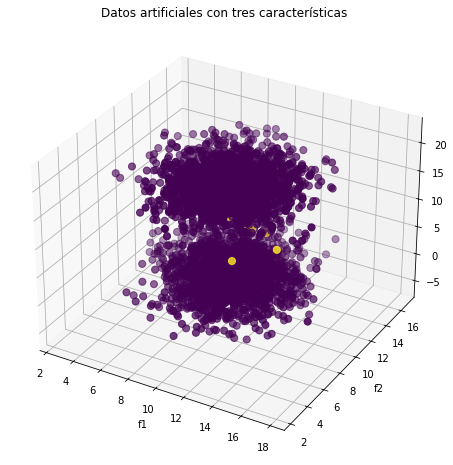

In [12]:
# Generar datos artificiales con make_blobs
X, y = make_blobs(n_samples=[2000,2000,10], 
                  centers=[(10,10,0),(10,10,16),(10,10,10)], 
                  n_features=3, 
                  cluster_std=[2, 2, 2], 
                  random_state=42)
#El 0 y el 1 son 0 y el 2 es 1, es la clase objetivo
y = [0 if (i == 0) or (i==1) else 1 for i in y]

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1], "f3": X[:, 2], "clase": y})

# Visualizar los datos generados
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["f1"], df["f2"], df["f3"], c=y, cmap='viridis', s=50)
ax.set_title('Datos artificiales con tres características')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.show()

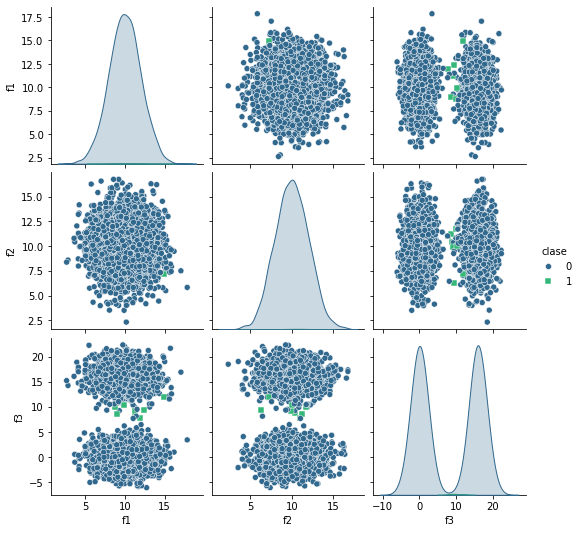

In [13]:
sns.pairplot(df, hue='clase', markers=["o", "s"], palette='viridis')
plt.show()

0.25


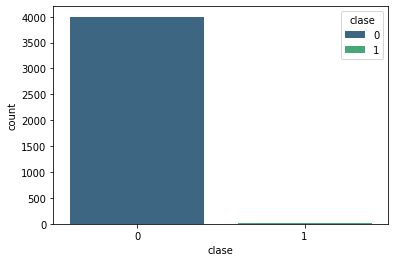

In [14]:
##¿Cuanto hay de cada clase?
sns.countplot(x='clase', data=df, hue='clase', palette='viridis')
print((len(df[df.clase==1])/len(df[df.clase==0]))*100)
random_state = 1

Cuales seran los mejores hiperparametros para un modelo KNN?

Los resultados son inestables y varian muchos segun la muestra, por lo que no se puede confiar en el modelo.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#GridSearch en un dataset de este tipo tiende al sobreajuste
clf = KNeighborsClassifier(n_neighbors=3)
X = df[df.columns.drop('clase')]
y = df['clase']


In [16]:
#El accuracy es excelente, pero las otras metricas no, y para peor varian mucho segun la muestra!!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_state) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
random_state += 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       0.33      0.33      0.33         3

    accuracy                           1.00      1203
   macro avg       0.67      0.67      0.67      1203
weighted avg       1.00      1.00      1.00      1203



Si el fenomeno que se intenta descubrir es muy simple entonces undersampling puede ser una posibilidad, se debe ponderar si es posible usando por ejemplo curvas de aprendizaje, si se prueba ser verá que no hay convergencia

Este es un caso muy simple y a la vez extremo, si la clase de interes tuviese mas registros y la clase alternativas muchos mas, aunque el porcentaje de la clase de interes sea bajo vale la pena revisar las curvas de aprendizaje para ser si podemos hacer undersampling.

Hacemos nosotros oversampling.

<Axes: xlabel='clase', ylabel='count'>

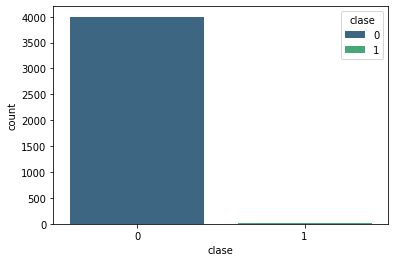

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_res = pd.concat([X_resampled, y_resampled], axis=1)
##¿Cuanto hay de cada clase?
sns.countplot(x='clase', data=df, hue='clase', palette='viridis')


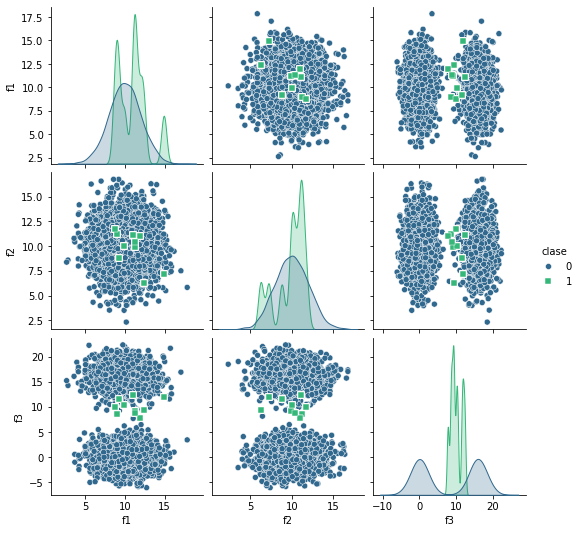

In [8]:
sns.pairplot(df_res, hue='clase', markers=["o", "s"], palette='viridis')
plt.show()


In [9]:
X = df_res[df_res.columns.drop('clase')]
y = df_res['clase']
clf = KNeighborsClassifier(n_neighbors=3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1200
           1       0.99      1.00      1.00      1200

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



Los resultados mejoran y son estables. Este es un ejemplo extremo, en general las diferencias no son tan evidentes.

-----  